<a href="https://colab.research.google.com/github/The-Great-AnandSrivastava/Econometric-Analysis-IIFT/blob/main/Ecotrix_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Load and Check for Missing Values:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from scipy.stats import shapiro

df = pd.read_csv('Final-Ecotrix-Data_1.csv')

# Display the Dataset
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
display(df)

# Display Dataset Information
df.info()

# Check for Missing Values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())

,Country Name,Country_Group,"Unemployment, total (% of total labor force) (modeled ILO estimate)",GDP growth (annual %),"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Inflation, consumer prices (annual %)",Urban population (% of total population),Trade Openess (% of GDP),Gross capital formation (% of GDP)
0,Afghanistan,Underdeveloped,14.100,-6.240170,17.748,38.500,10.600000,26.616,72.885470,16.700000
1,Albania,Developing,11.588,4.856402,28.100,71.367,6.725203,63.799,84.698064,24.810000
2,Algeria,Developing,12.437,3.600000,31.992,45.641,9.265516,74.772,51.202376,34.851650
3,Argentina,Developing,6.805,4.956370,18.980,68.413,72.400000,92.347,31.547708,17.625050
4,Armenia,Developing,8.608,12.600000,19.011,72.719,8.640911,63.573,101.410778,21.634310
5,Australia,Developed,3.701,4.268946,8.233,79.521,6.594097,86.488,45.821770,23.573510
6,Austria,Developed,4.992,4.806430,10.350,78.469,8.546870,59.256,124.383451,27.548970
7,Azerbaijan,Developing,5.650,4.714802,13.583,76.589,13.852260,57.170,86.982273,12.003710
8,"Bahamas, The",Developing,9.870,10.782010,24.724,78.164,5.605406,83.492,83.174157,21.825610
9,Bahrain,Developing,1.326,4.891500,5.880,74.131,3.625741,89.743,166.345618,25.590000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Country Name                                                                                   117 non-null    object 
 1   Country_Group                                                                                  117 non-null    object 
 2   Unemployment, total (% of total labor force) (modeled ILO estimate)                            117 non-null    float64
 3   GDP growth (annual %)                                                                          117 non-null    float64
 4   Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)           117 non-null    float64
 5   Labor force participat

#**Descriptive Analysis, Correlation Matrix, Heat Map and Box-Plots & Pair Plots**

Summary Statistics:
       Unemployment, total (% of total labor force) (modeled ILO estimate)  \
count                                         117.000000                     
mean                                            6.769282                     
std                                             5.387515                     
min                                             0.130000                     
25%                                             3.524000                     
50%                                             5.247000                     
75%                                             8.299000                     
max                                            28.838000                     

       GDP growth (annual %)  \
count             117.000000   
mean                3.810687   
std                 4.779769   
min               -28.758600   
25%                 2.462769   
50%                 4.208871   
75%                 5.668817   
max                20

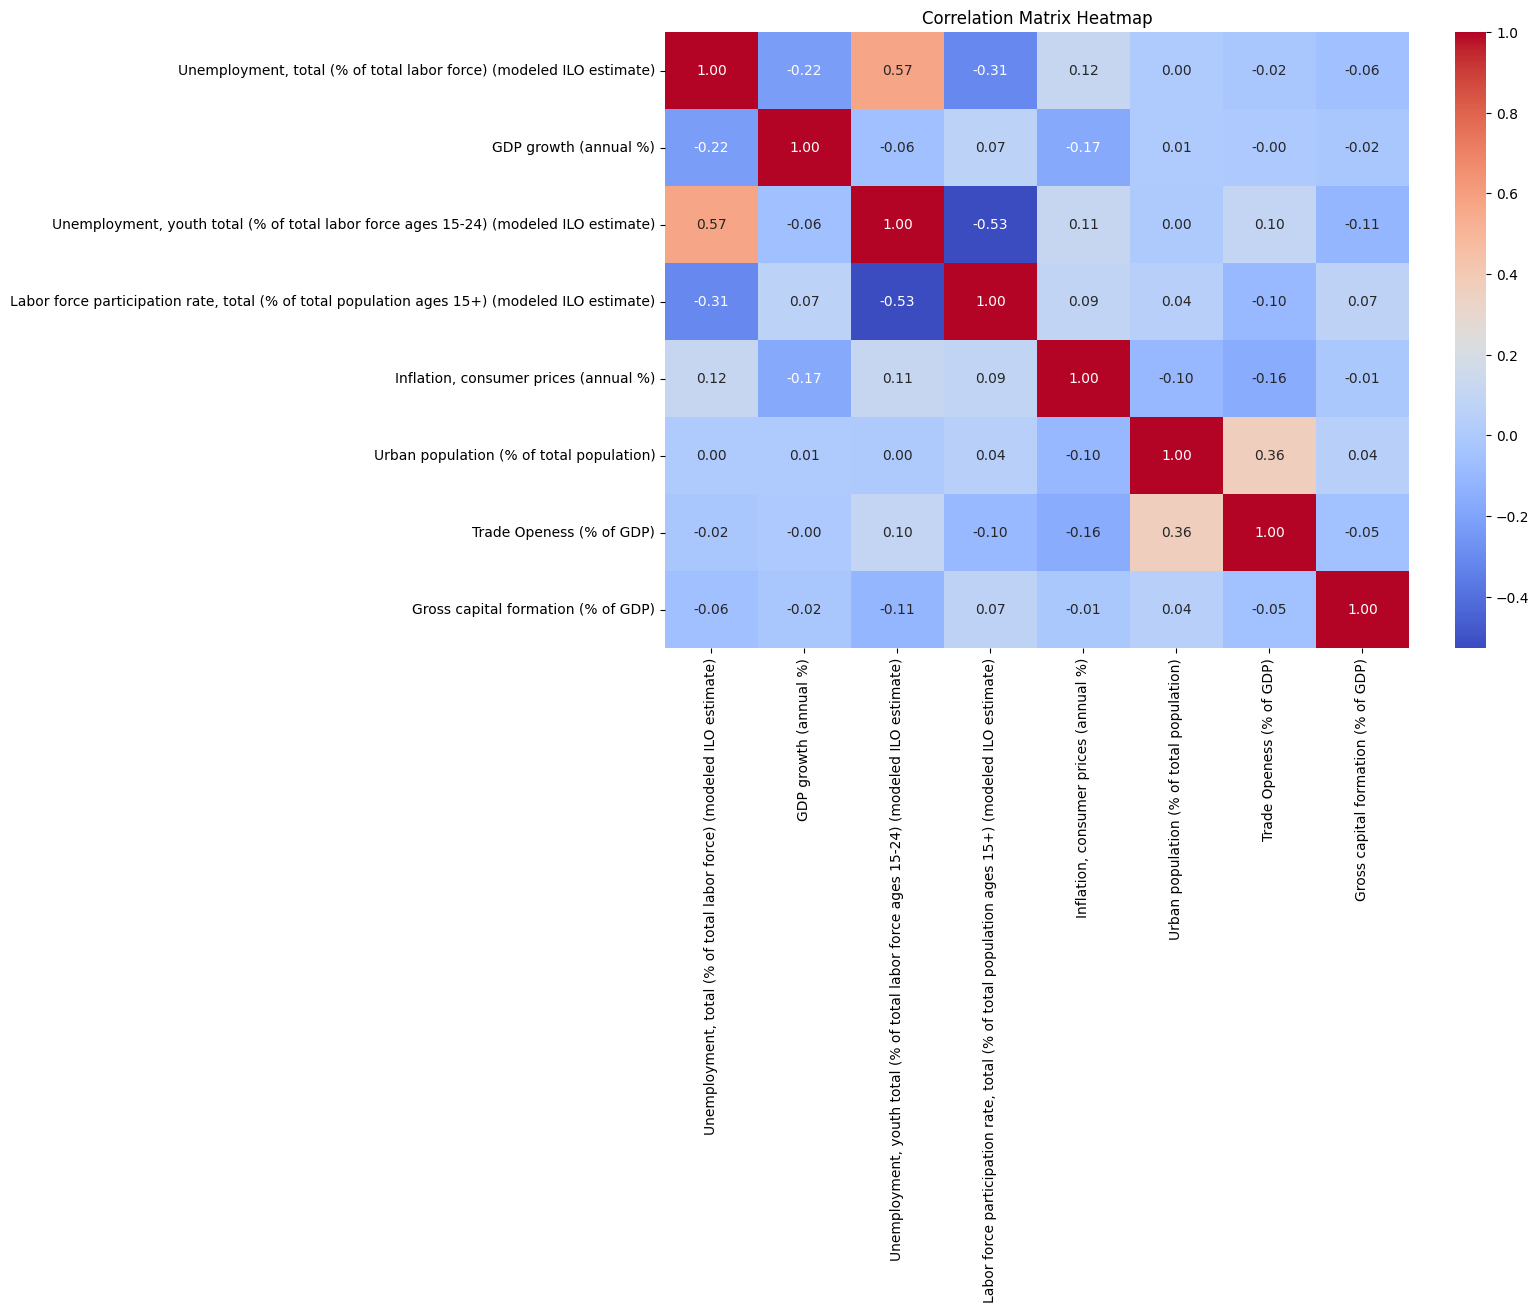

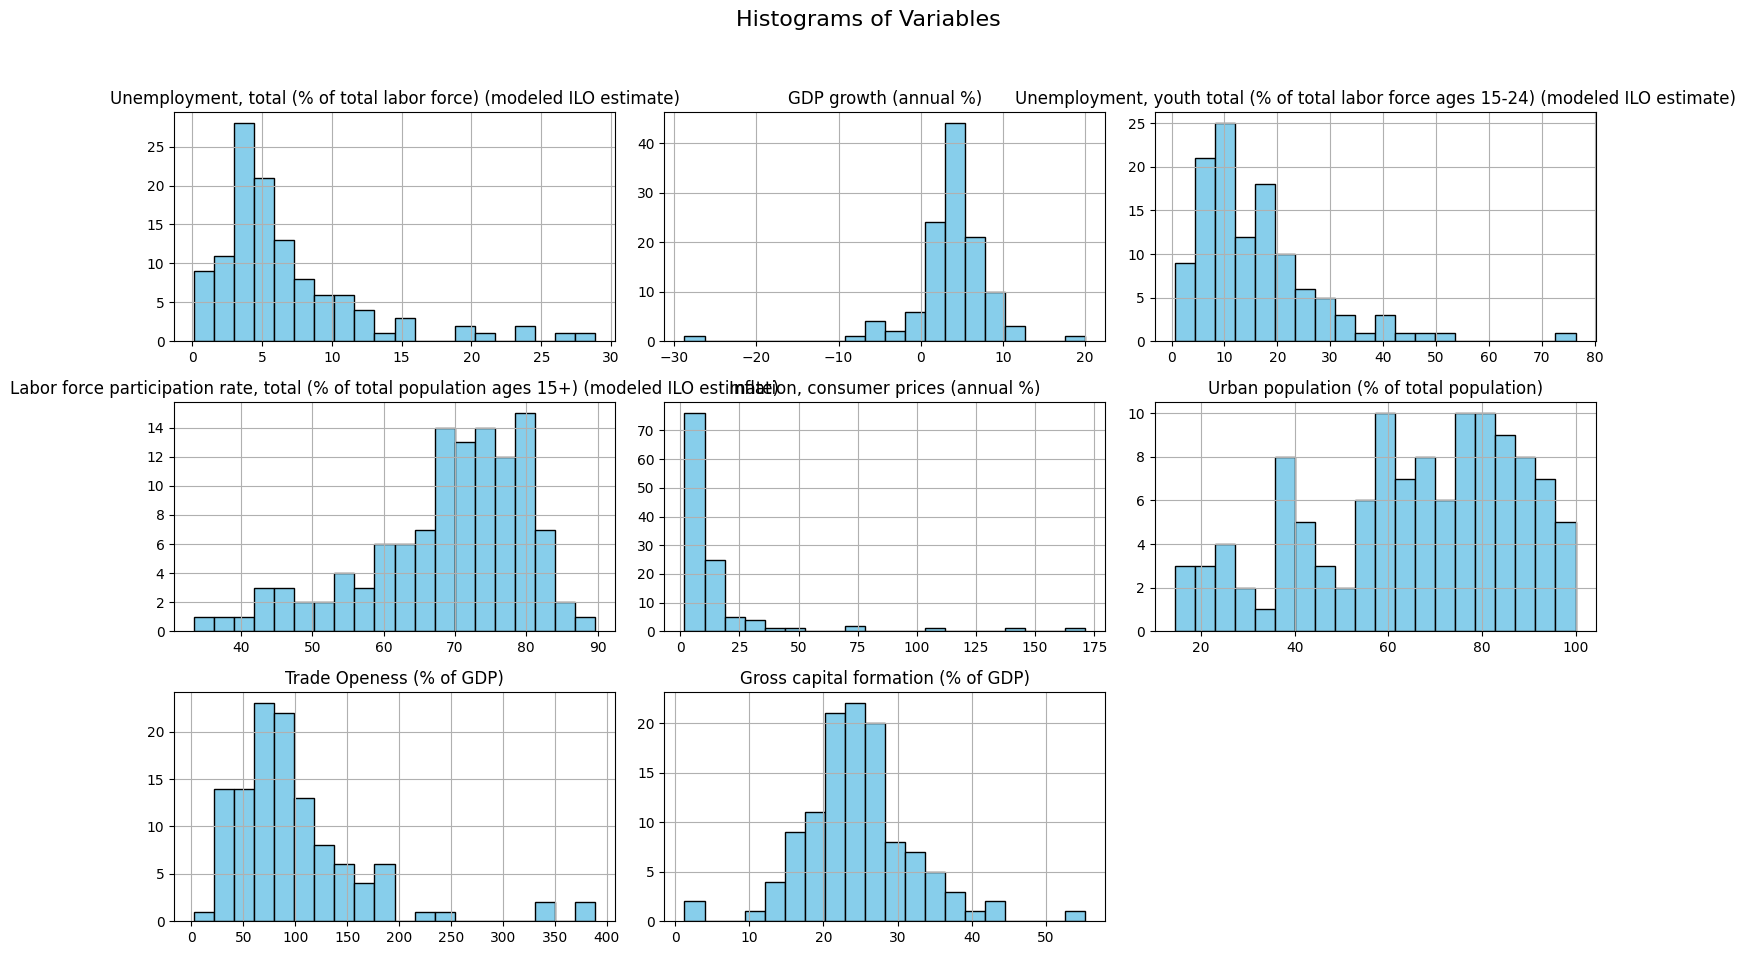

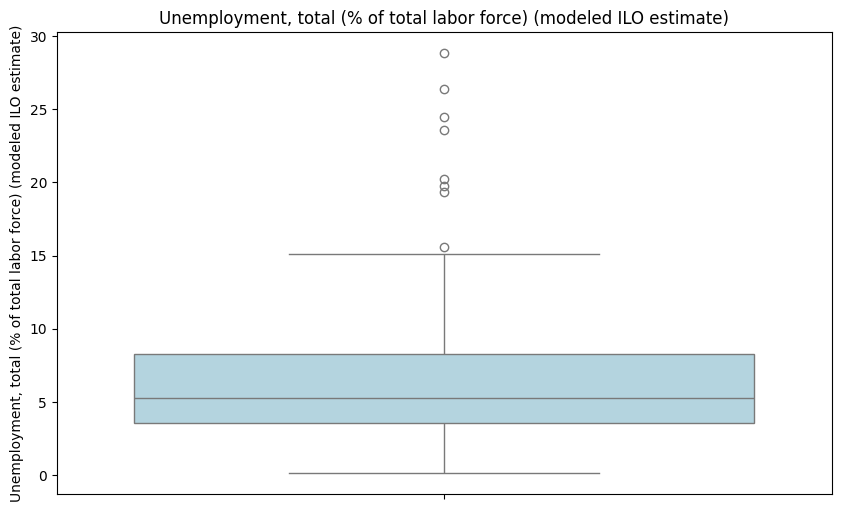

<Figure size 1000x600 with 0 Axes>

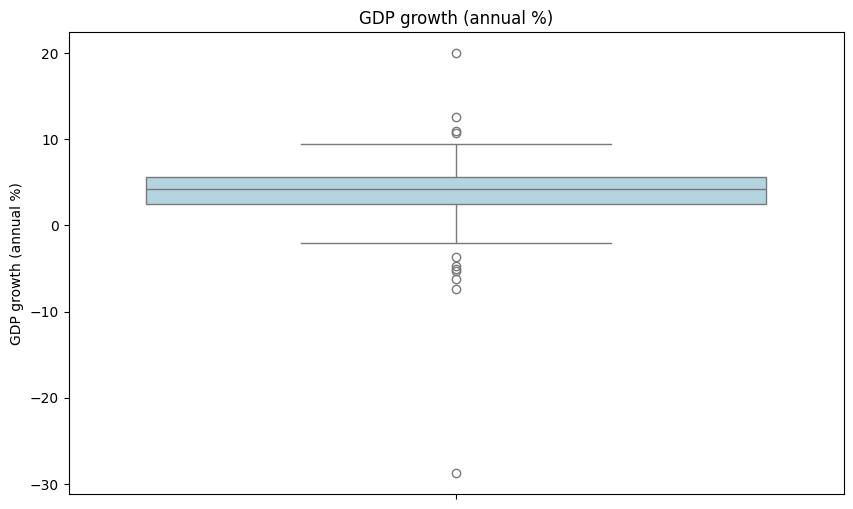

<Figure size 1000x600 with 0 Axes>

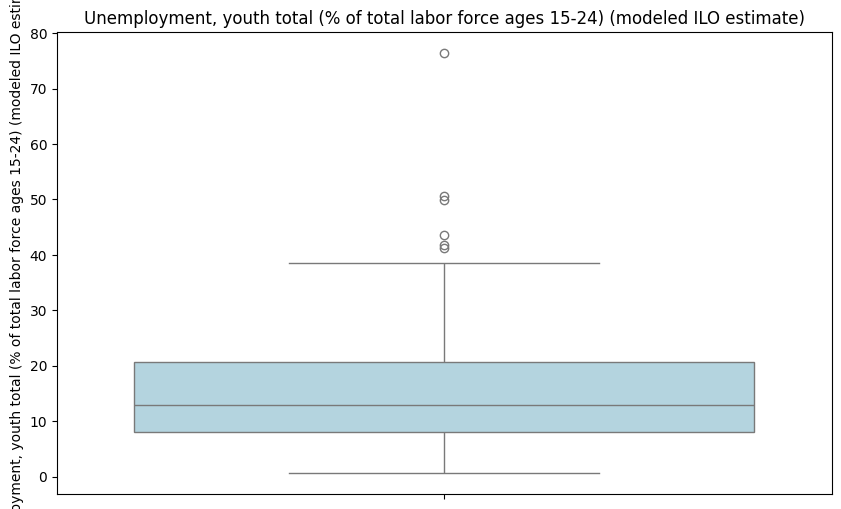

<Figure size 1000x600 with 0 Axes>

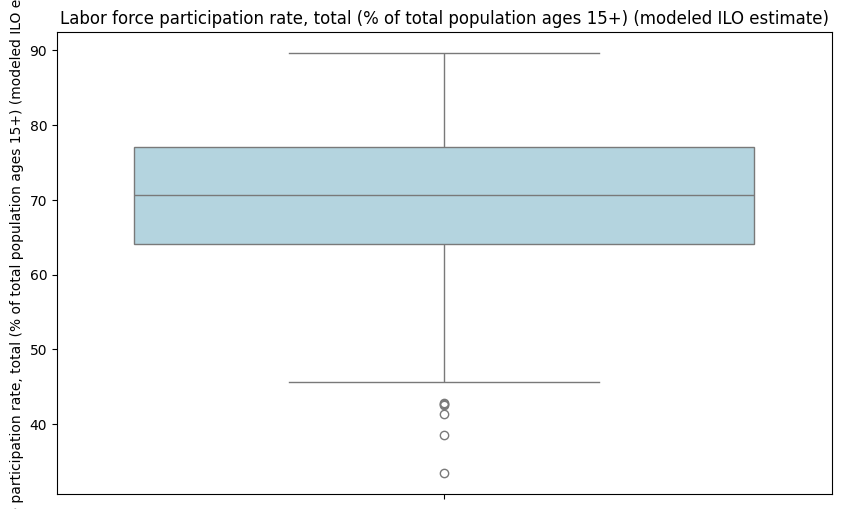

<Figure size 1000x600 with 0 Axes>

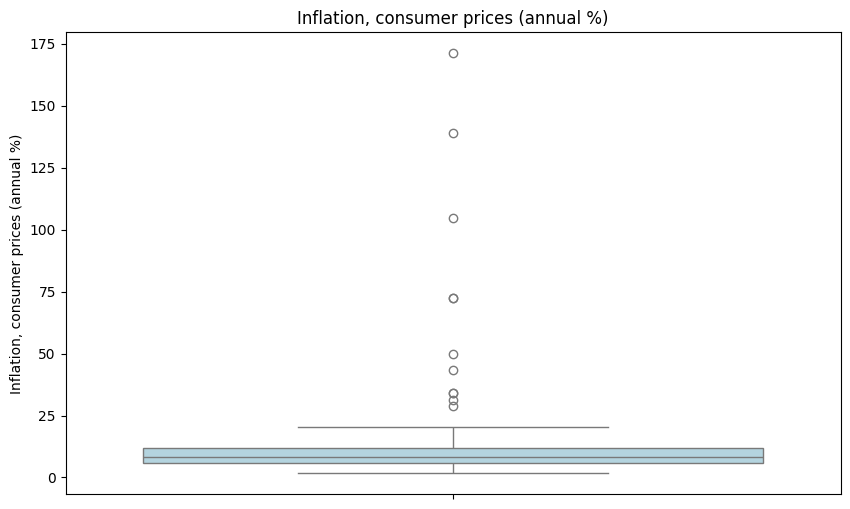

<Figure size 1000x600 with 0 Axes>

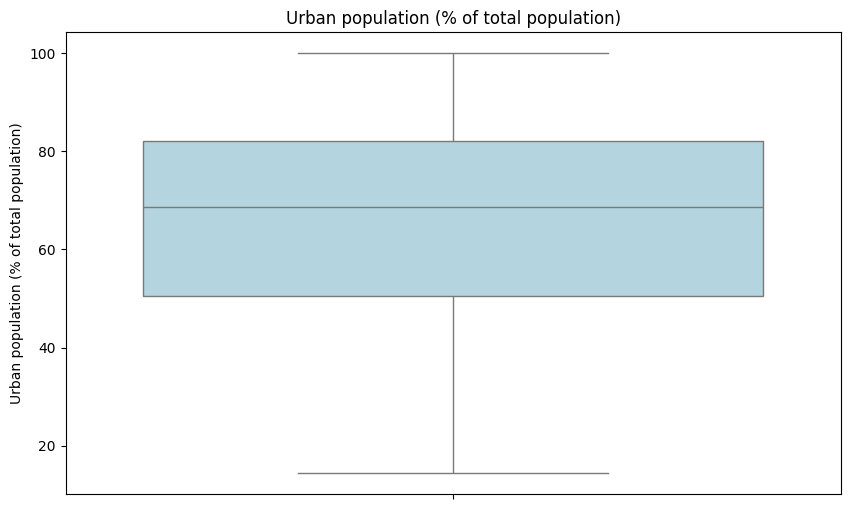

<Figure size 1000x600 with 0 Axes>

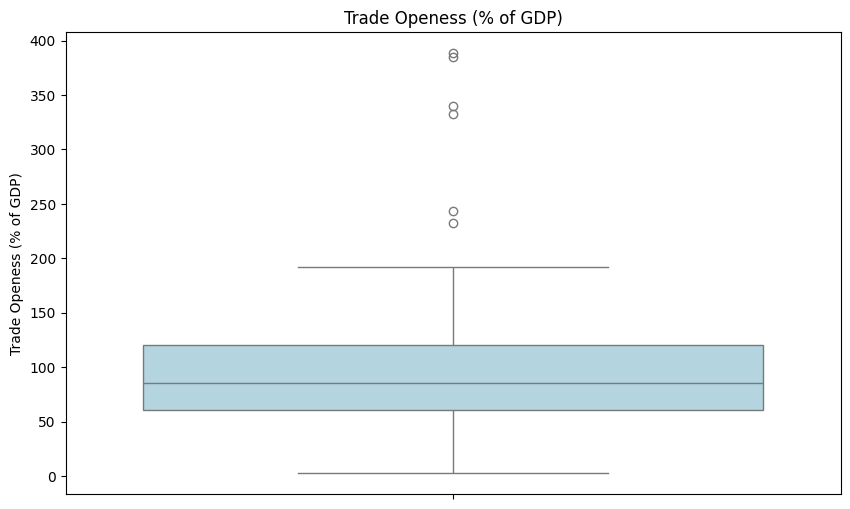

<Figure size 1000x600 with 0 Axes>

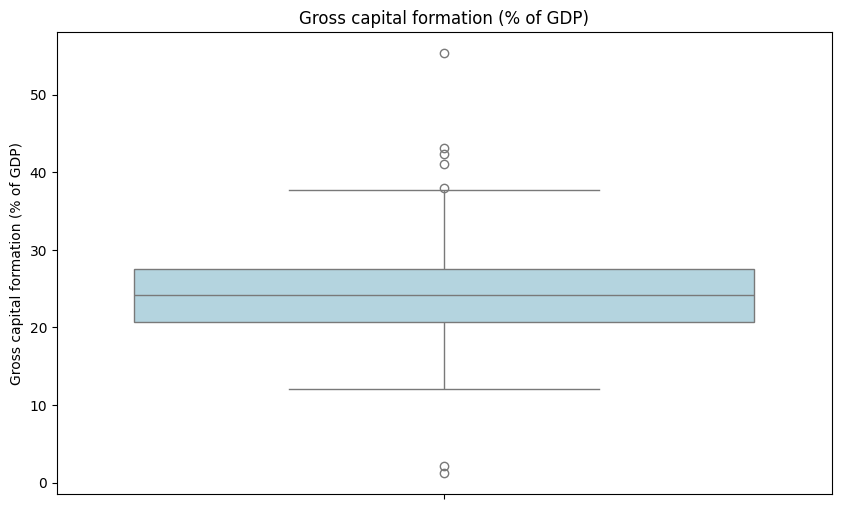

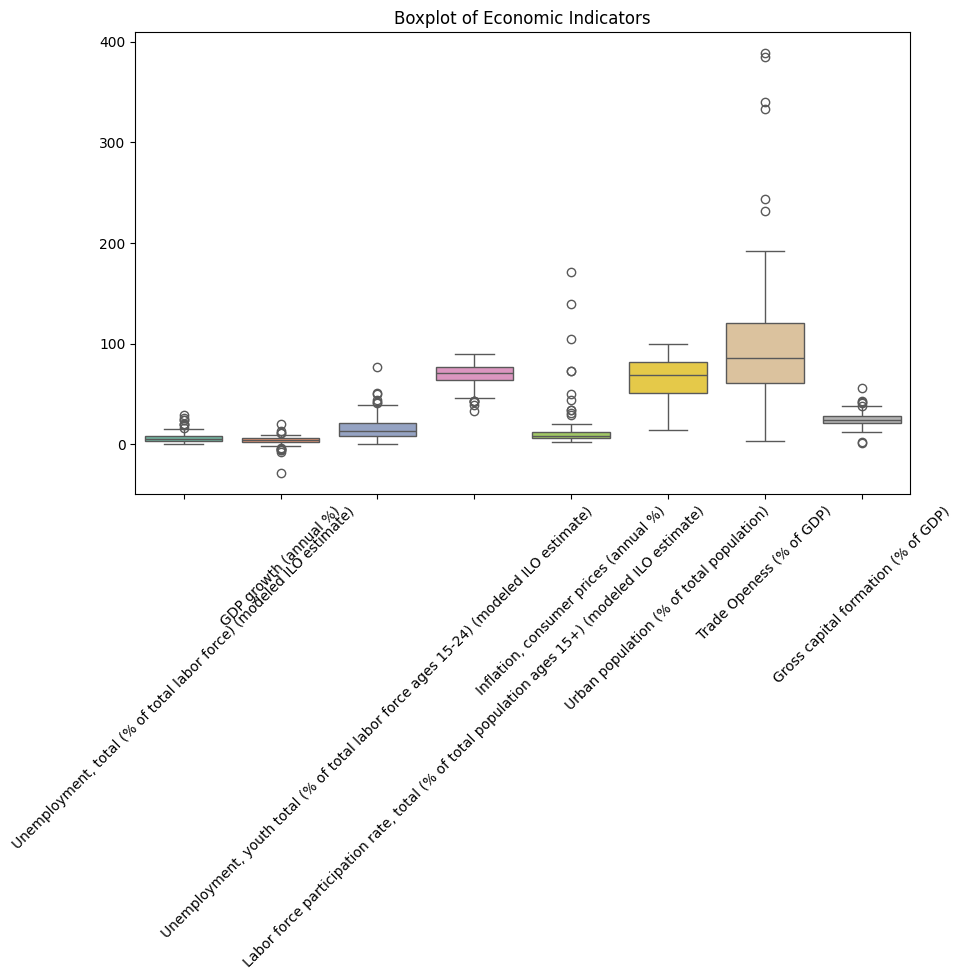

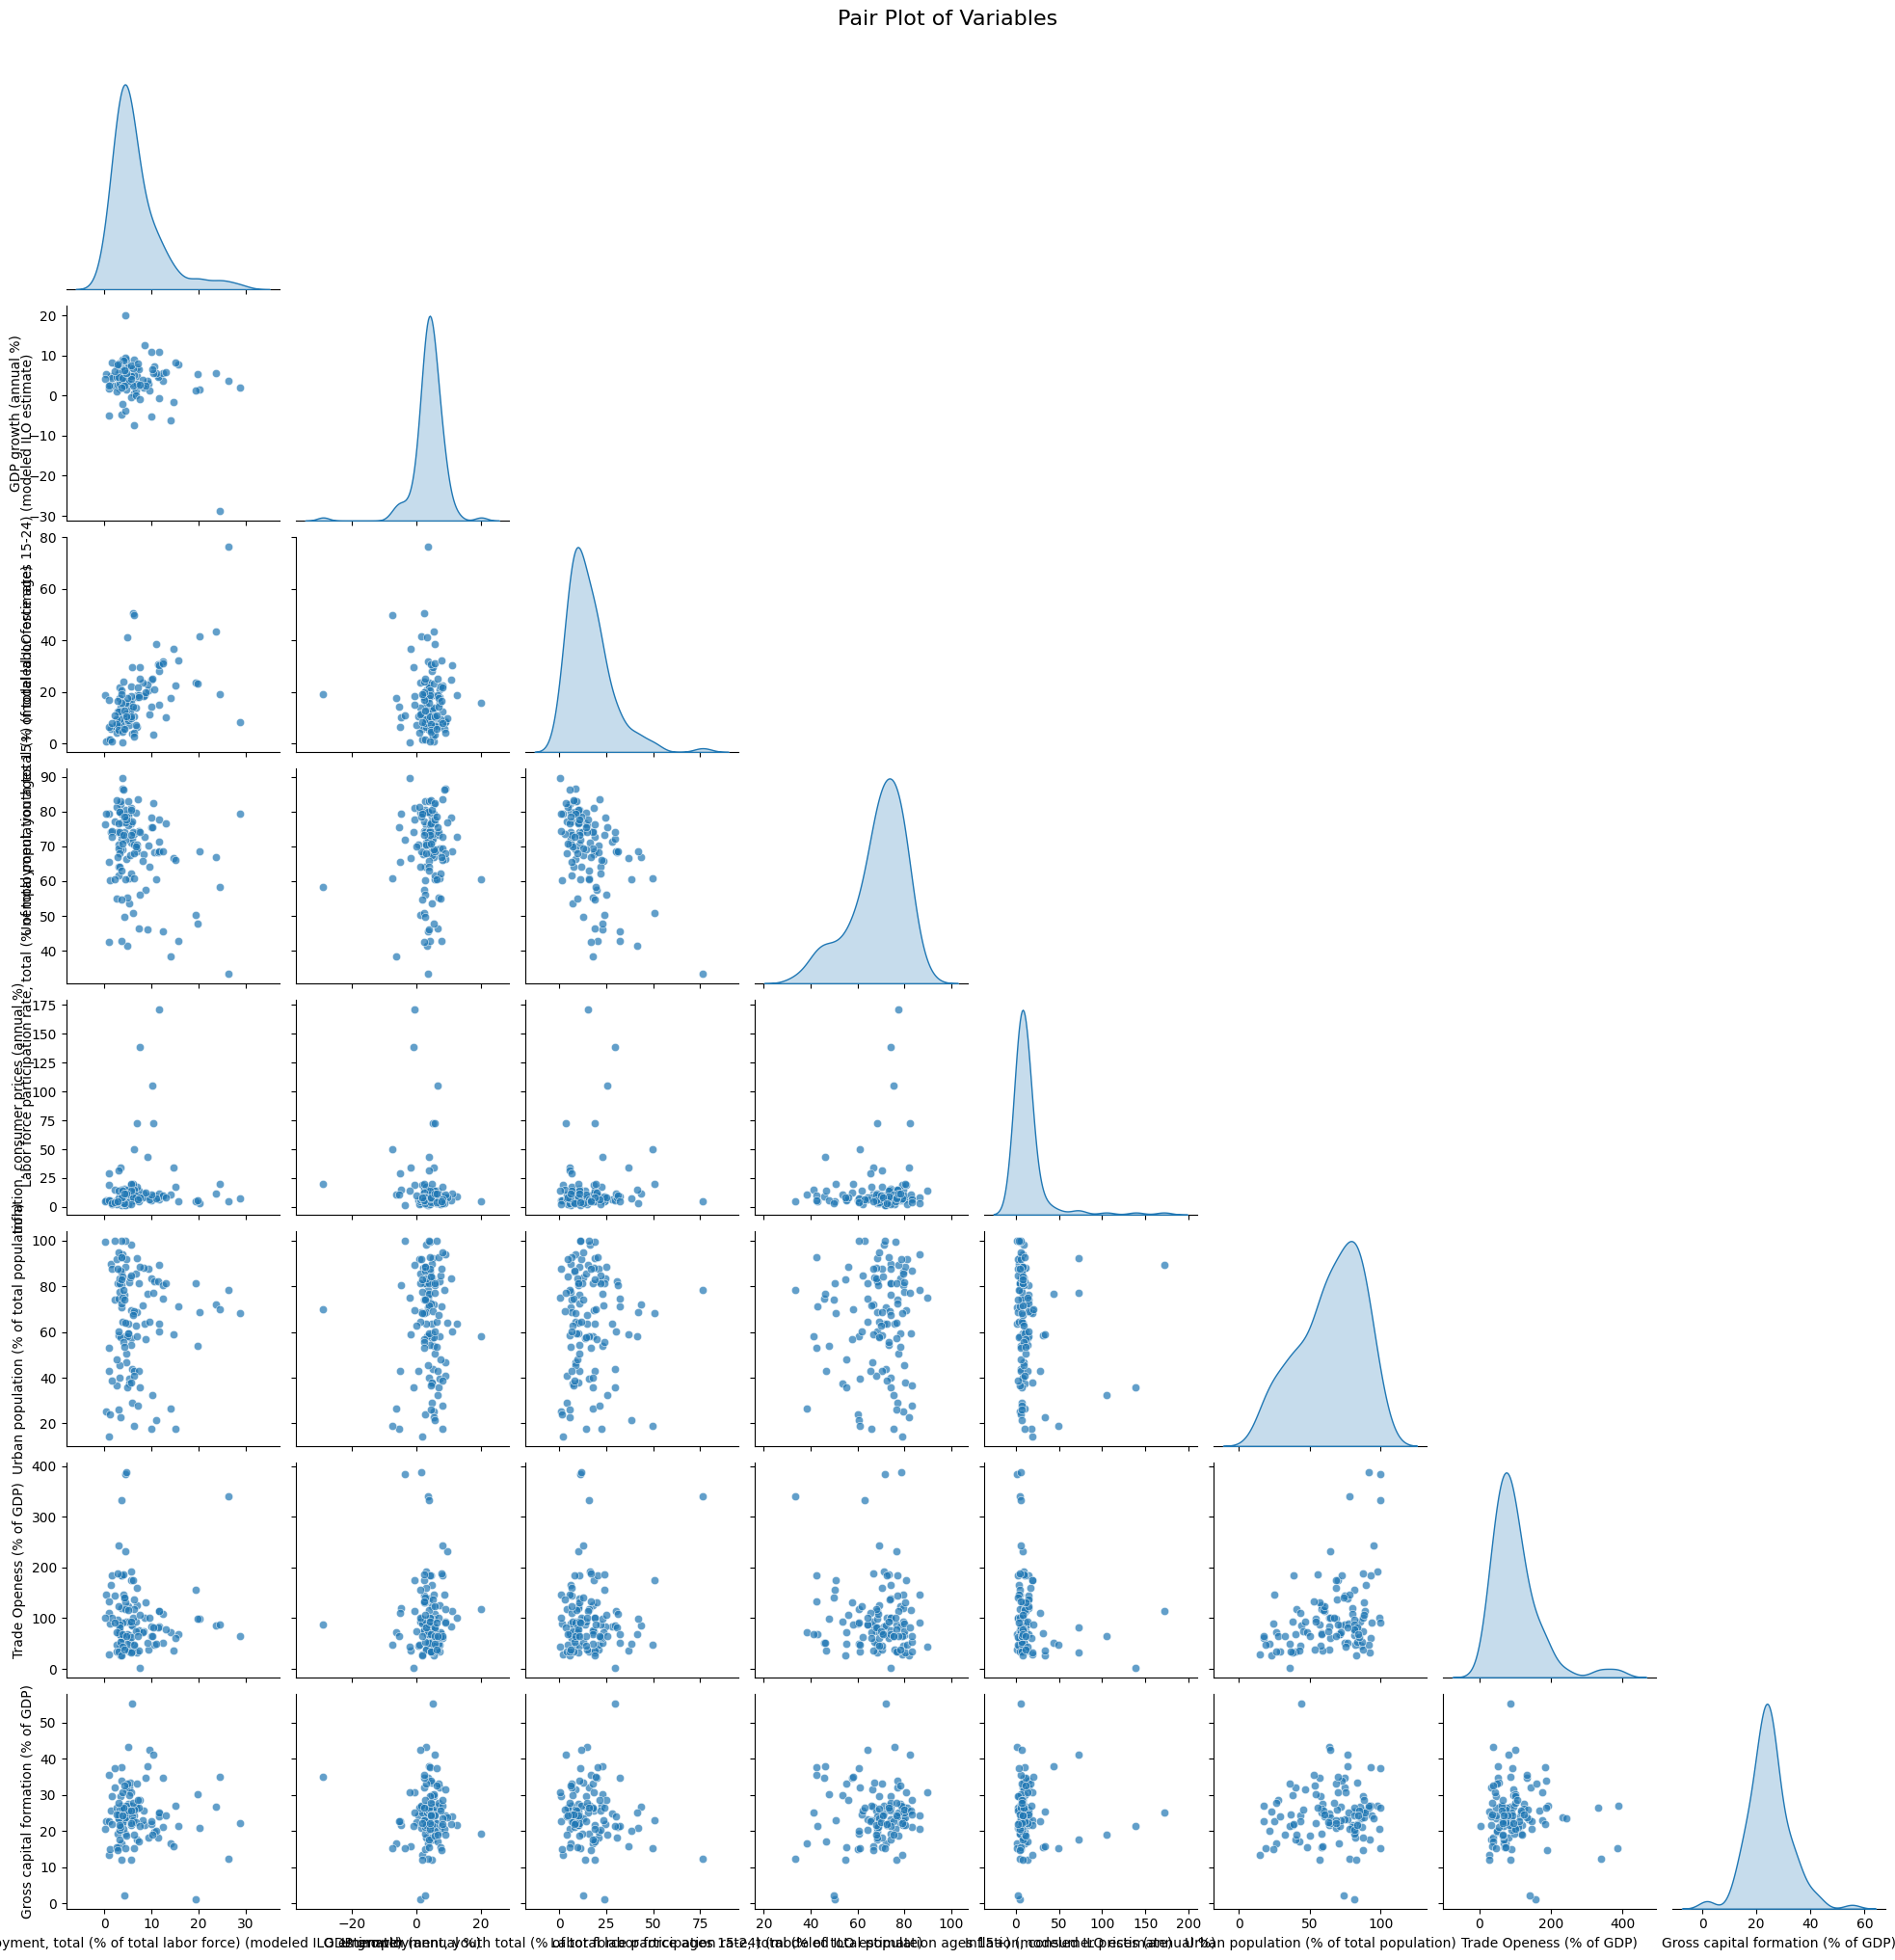

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Summary statistics
descriptive_stats = df_numeric.describe()
print("Summary Statistics:")
print(descriptive_stats)

# Correlation matrix
correlation_matrix = df_numeric.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Histograms for each variable
df_numeric.hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Variables", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Boxplots for each variable
for column in df_numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_numeric[column], color="lightblue")
    plt.title(column)
    plt.show()

    plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric, palette="Set2")
plt.xticks(rotation=45)
plt.title('Boxplot of Economic Indicators')
plt.show()

# Pair plot to visualize relationships
sns.pairplot(df_numeric, diag_kind="kde", corner=True, plot_kws={"alpha": 0.7})
plt.suptitle("Pair Plot of Variables", fontsize=16, y=1.02)
plt.show()


#**Checking for Linearity: Partial Regression Plot**

                                                     OLS Regression Results                                                    
Dep. Variable:     Unemployment, total (% of total labor force) (modeled ILO estimate)   R-squared:                       0.373
Model:                                                                             OLS   Adj. R-squared:                  0.333
Method:                                                                  Least Squares   F-statistic:                     9.280
Date:                                                                 Sat, 28 Dec 2024   Prob (F-statistic):           5.65e-09
Time:                                                                         09:05:36   Log-Likelihood:                -335.20
No. Observations:                                                                  117   AIC:                             686.4
Df Residuals:                                                                      109   BIC:           

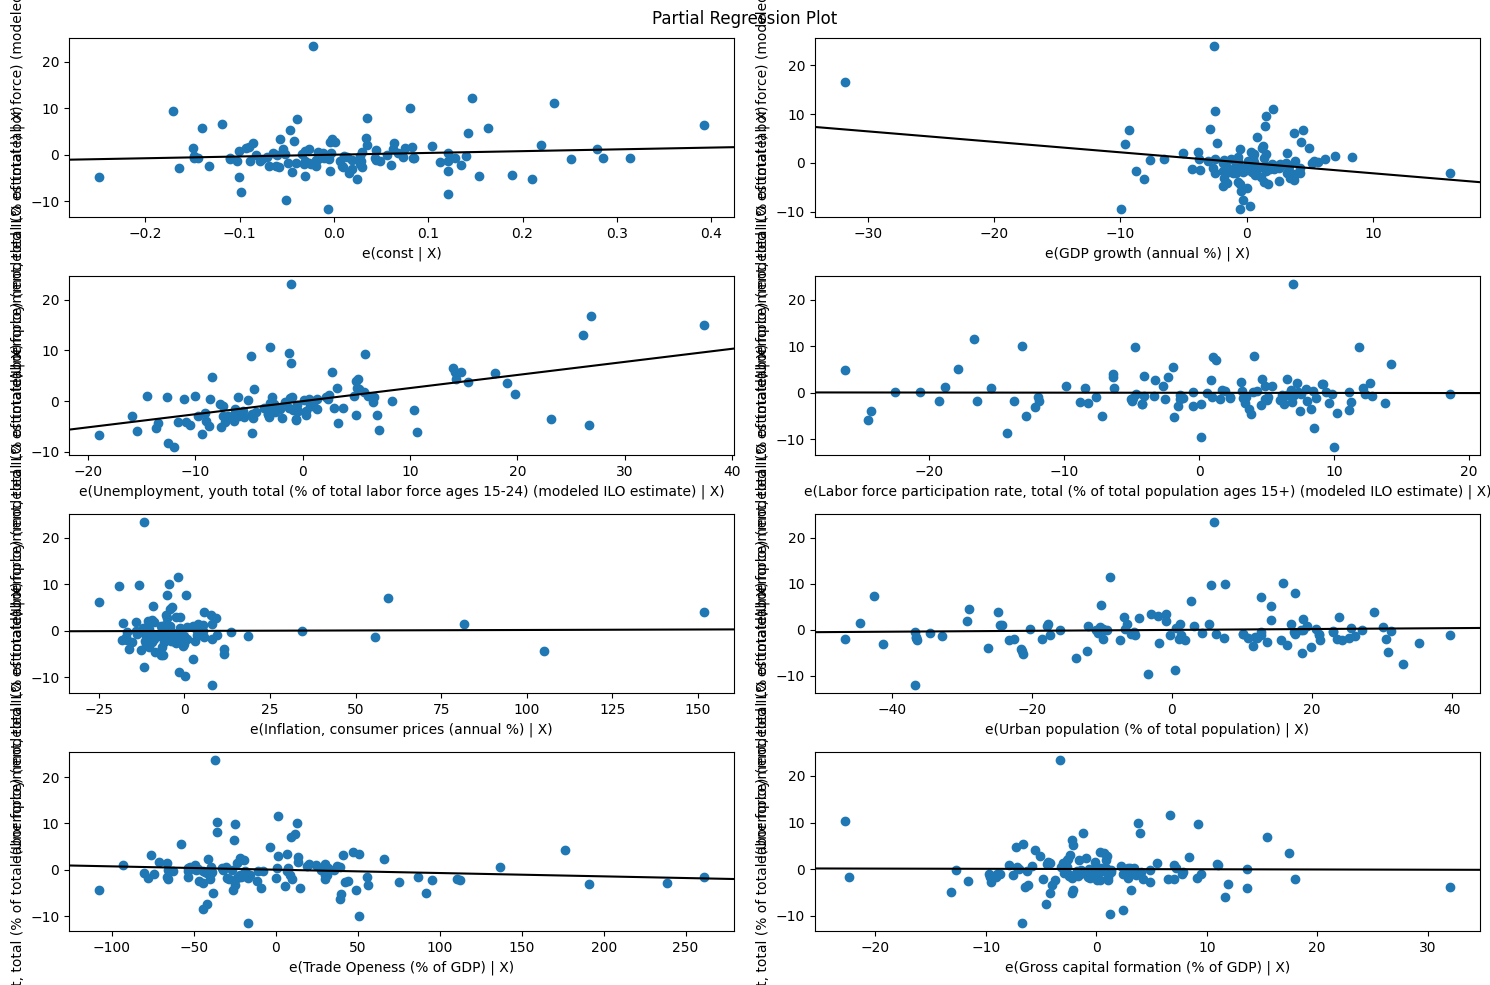

In [ ]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
df_numeric = df.select_dtypes(include=['number'])

# Define the dependent and independent variables
dependent_var = 'Unemployment, total (% of total labor force) (modeled ILO estimate)'  # Replace with the actual dependent variable name
independent_vars = df_numeric.drop(columns=[dependent_var]).columns

# Fit a linear regression model
X = sm.add_constant(df_numeric[independent_vars])  # Add constant for intercept
y = df_numeric[dependent_var]
model = sm.OLS(y, X).fit()

# Display OLS Regression Results
print(model.summary())

# Plot partial regression plots
fig = plt.figure(figsize=(15, 10))
plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()



                                                     OLS Regression Results                                                    
Dep. Variable:     Unemployment, total (% of total labor force) (modeled ILO estimate)   R-squared:                       0.400
Model:                                                                             OLS   Adj. R-squared:                  0.356
Method:                                                                  Least Squares   F-statistic:                     9.219
Date:                                                                 Sat, 28 Dec 2024   Prob (F-statistic):           1.06e-08
Time:                                                                         11:41:02   Log-Likelihood:                -295.24
No. Observations:                                                                  105   AIC:                             606.5
Df Residuals:                                                                       97   BIC:           

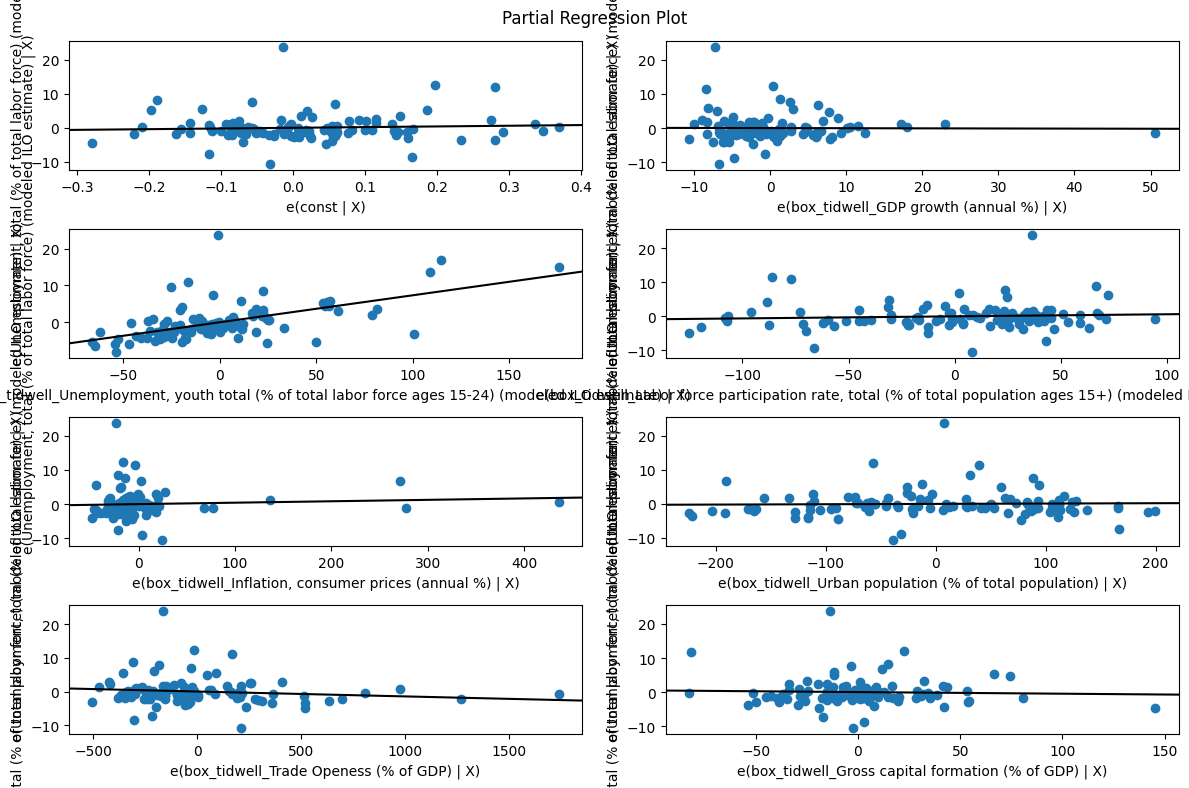

In [ ]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Define the dependent and independent variables
dependent_var = 'Unemployment, total (% of total labor force) (modeled ILO estimate)'  # Replace with the actual dependent variable name
independent_vars = df_numeric.drop(columns=[dependent_var]).columns

# Remove negative and zero values for Box-Tidwell Transformation
for col in independent_vars:
    df_numeric = df_numeric[df_numeric[col] > 0]

# Box-Tidwell transformation on independent variables
transformed_vars = {}
for var in independent_vars:
    transformed_vars[var] = np.log(df_numeric[var]) * df_numeric[var]
    df_numeric[f"box_tidwell_{var}"] = transformed_vars[var]

# Fit a linear regression model with transformed variables
transformed_cols = [f"box_tidwell_{var}" for var in independent_vars]
X_transformed = sm.add_constant(df_numeric[transformed_cols])
y = df_numeric[dependent_var]
model_transformed = sm.OLS(y, X_transformed).fit()

# Display OLS Regression Results for transformed data
print(model_transformed.summary())

# Partial regression plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model_transformed, fig=fig)
plt.tight_layout()
plt.show()

#**Formal Tests: Goldfeld-Quandt Test & Breusch-Pagan Test Original Data**

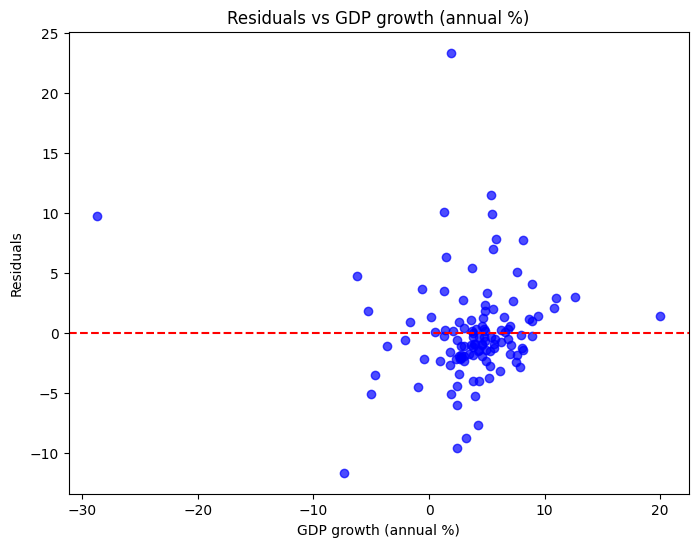

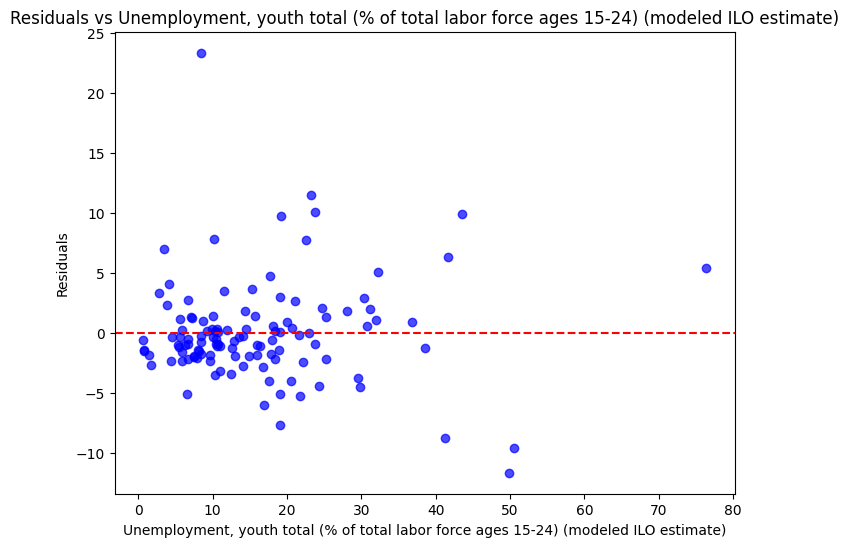

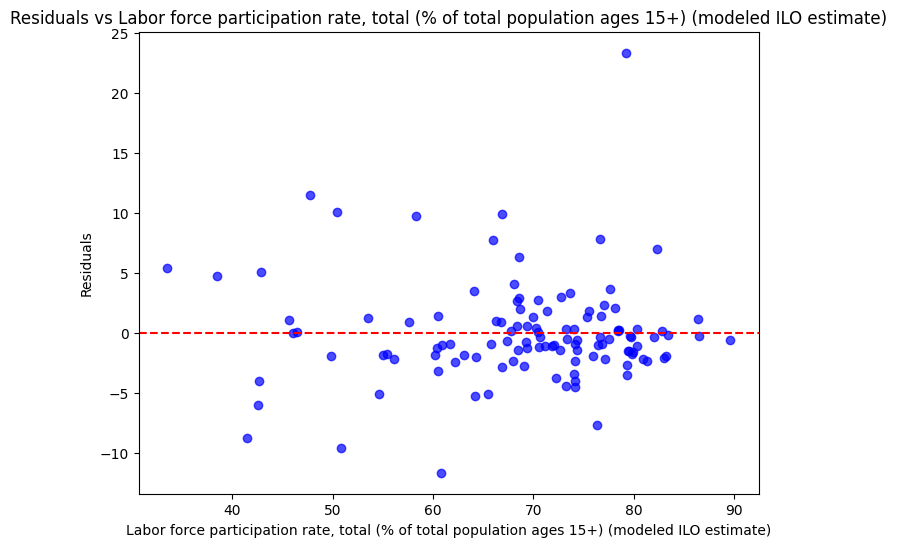

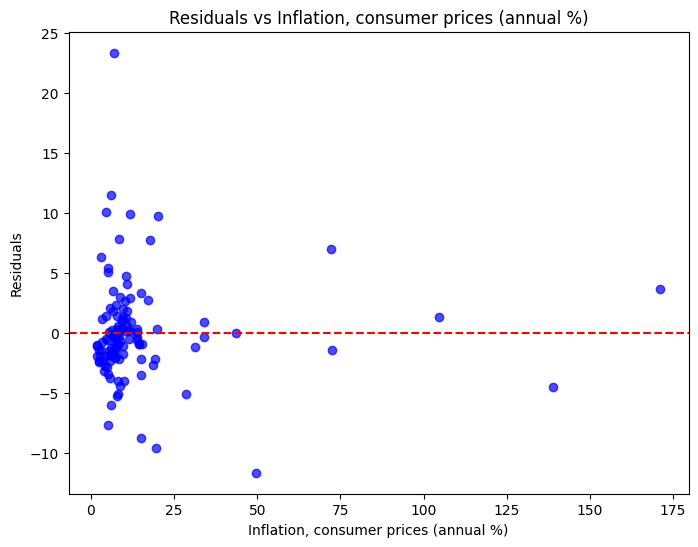

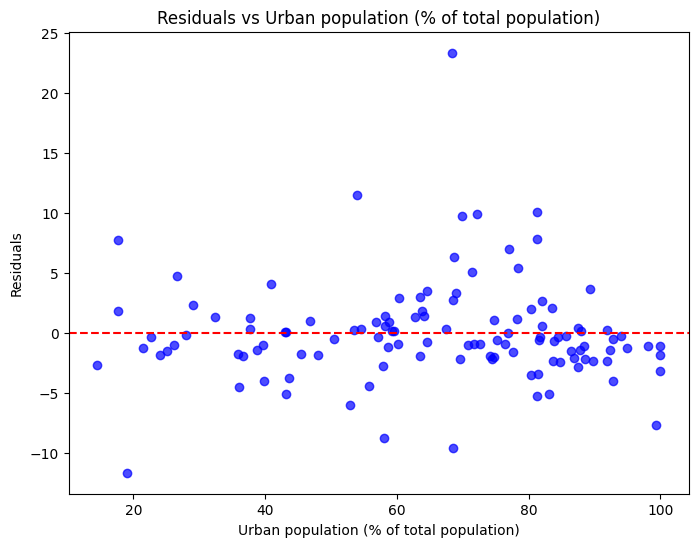

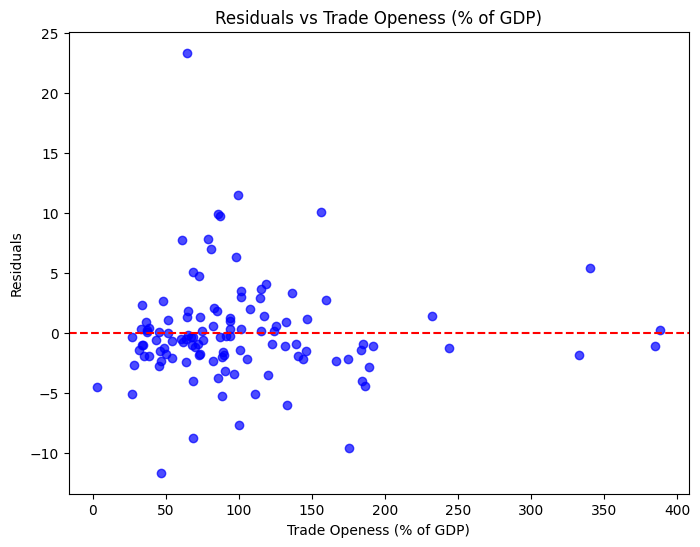

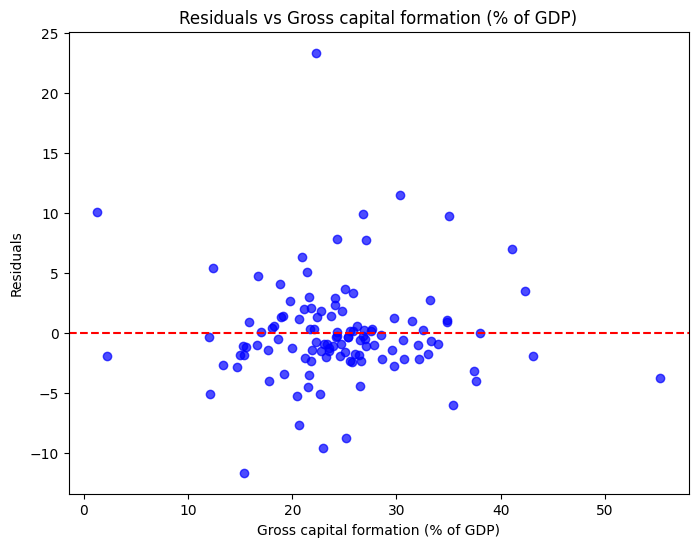

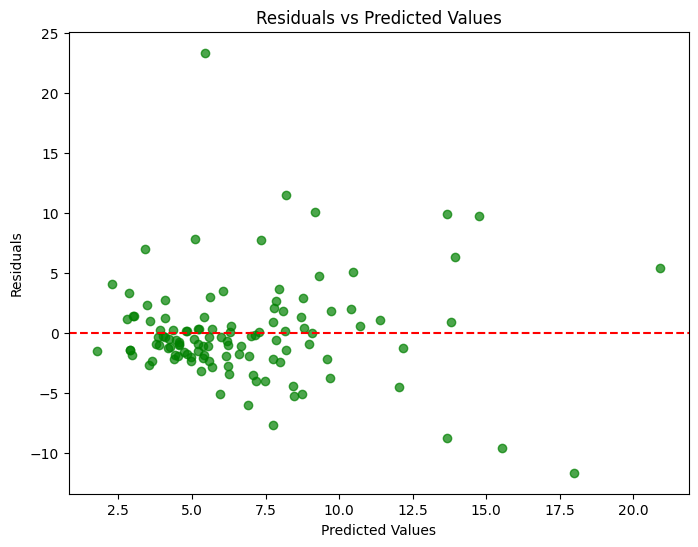

Goldfeld-Quandt Test:
F-statistic: 9.2967, p-value: 0.0000

Breusch-Pagan Test:
Lagrange Multiplier Statistic: 7.5841, p-value: 0.3707


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt

for var in independent_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_numeric[var], model.resid, alpha=0.7, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs {var}')
    plt.xlabel(var)
    plt.ylabel('Residuals')
    plt.show()

# Residuals vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Goldfeld-Quandt test
gq_test = het_goldfeldquandt(model.resid, model.model.exog)
print("Goldfeld-Quandt Test:")
print(f"F-statistic: {gq_test[0]:.4f}, p-value: {gq_test[1]:.4f}")

# Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print("\nBreusch-Pagan Test:")
print(f"Lagrange Multiplier Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")

# Bartlett's test (not directly applicable here, using residual variance check)
# Bartlett's test generally requires grouped data to compare variances, hence skipped.

#**Formal Tests: Goldfeld-Quandt Test & Breusch-Pagan Test Transformed Data**

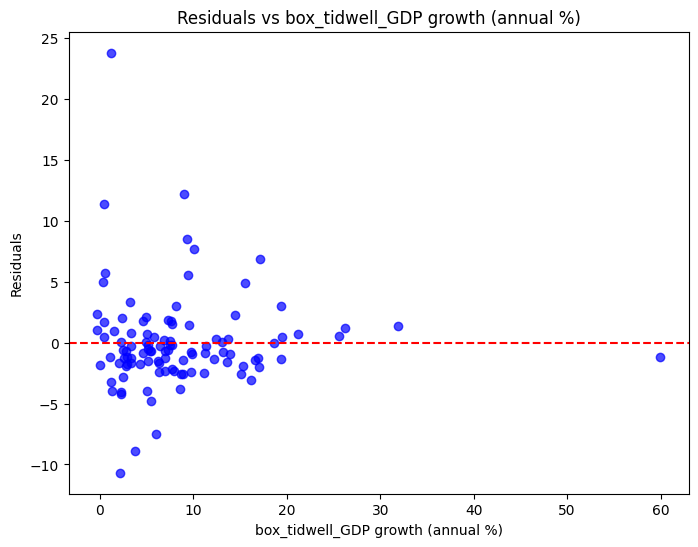

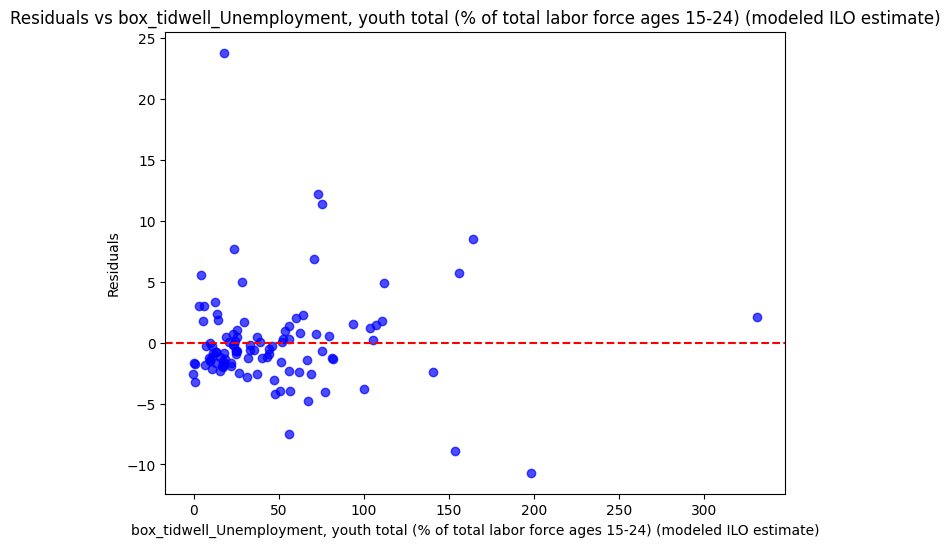

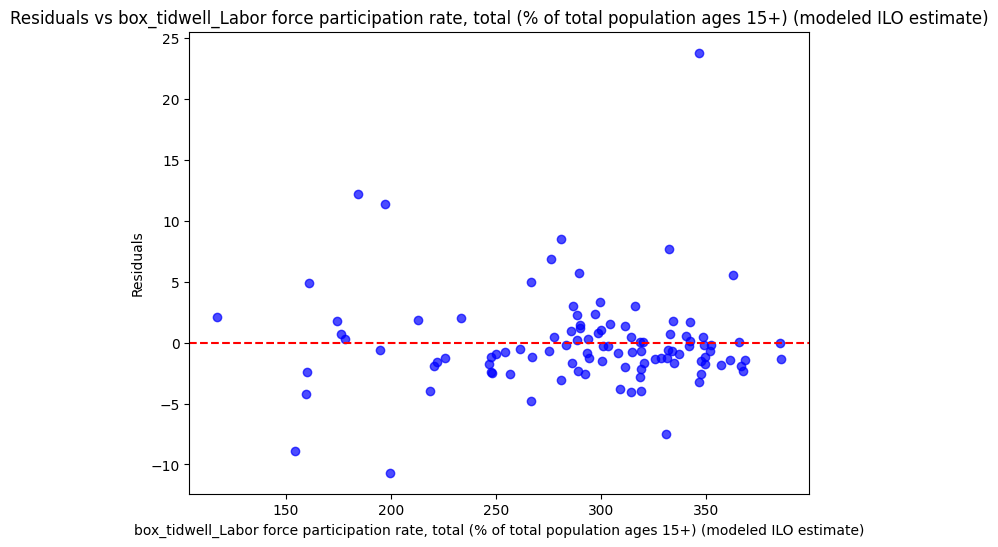

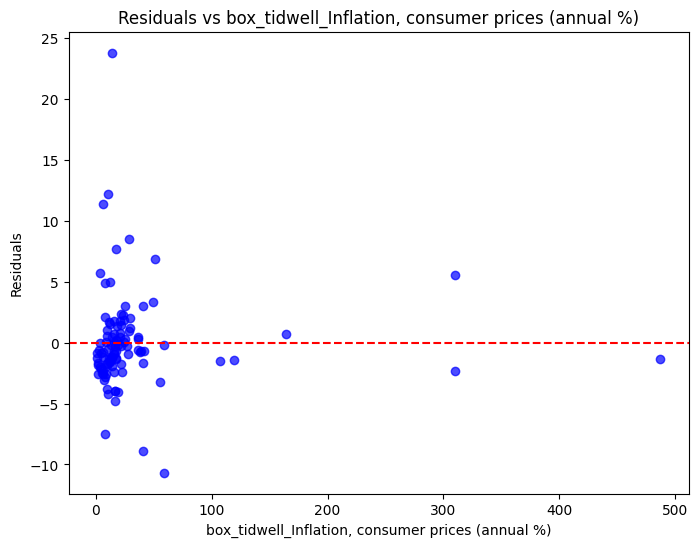

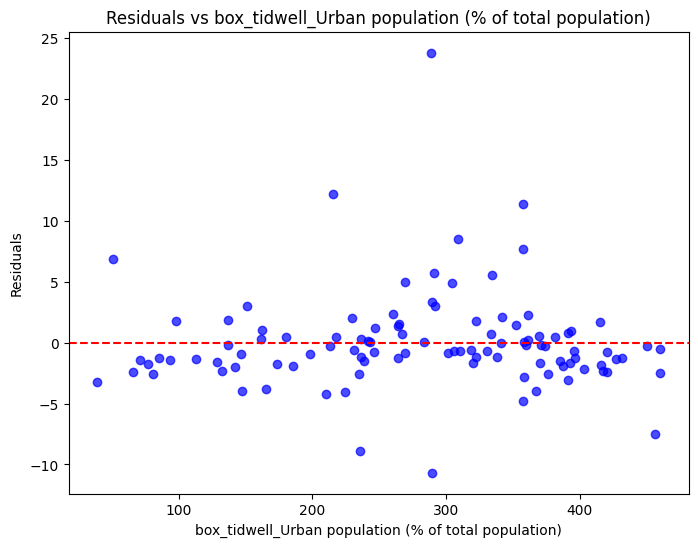

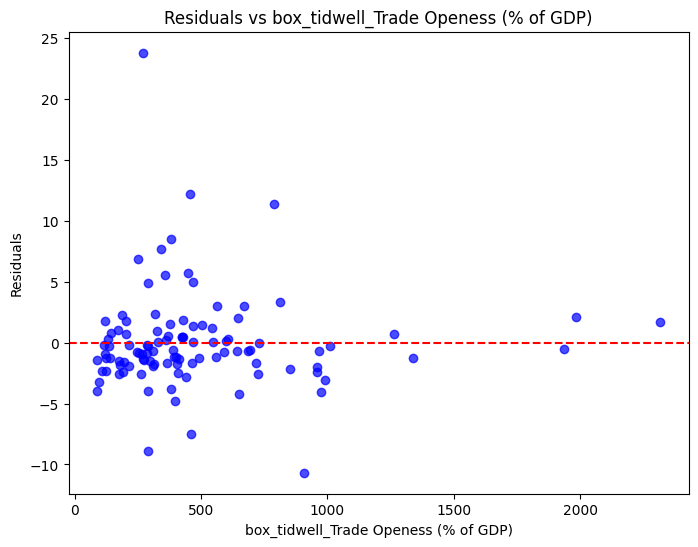

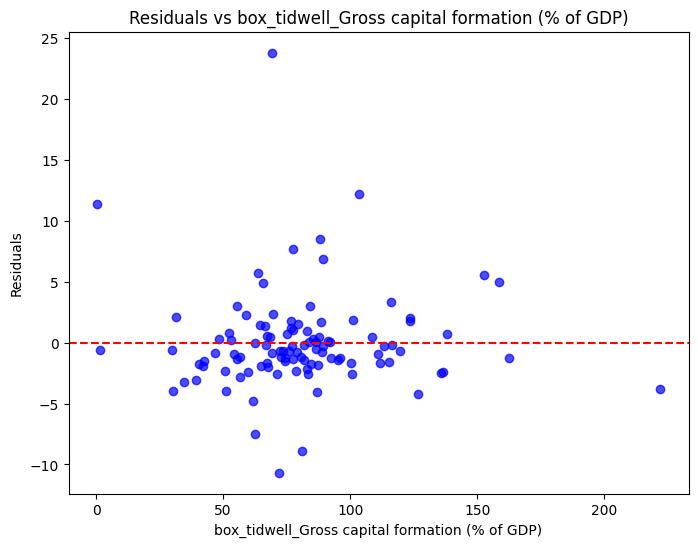

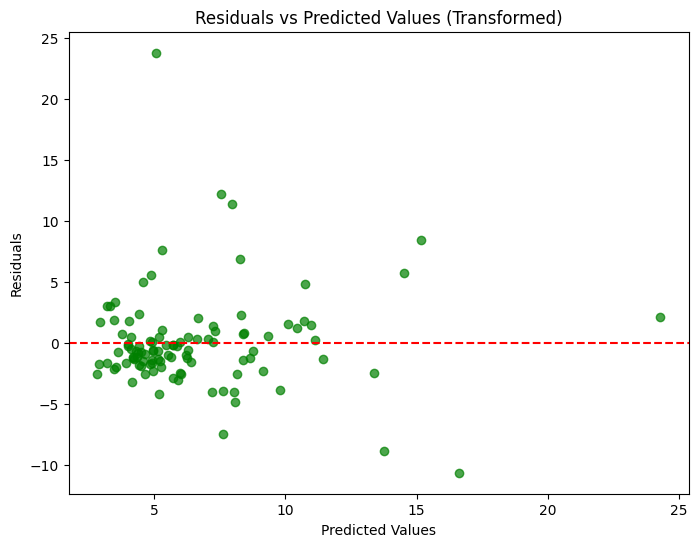


Breusch-Pagan Test:
Lagrange Multiplier Statistic: 3.4623, p-value: 0.8392


In [ ]:
# Residuals vs Regressors for transformed data
for var in transformed_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_numeric[var], model_transformed.resid, alpha=0.7, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs {var}')
    plt.xlabel(var)
    plt.ylabel('Residuals')
    plt.show()

# Residuals vs Predicted Values for transformed data
plt.figure(figsize=(8, 6))
plt.scatter(model_transformed.fittedvalues, model_transformed.resid, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Transformed)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Breusch-Pagan test
bp_test = het_breuschpagan(model_transformed.resid, model_transformed.model.exog) # Use model_transformed.model.exog
print("\nBreusch-Pagan Test:")
print(f"Lagrange Multiplier Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")


#**Normality Test: Kolmogorov-Smirnov Test, Shapiro-Wilk Test and Anderson-Darling Test**

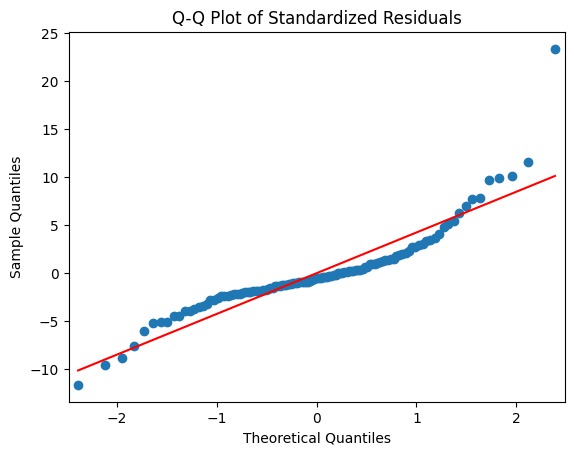


Kolmogorov-Smirnov Test:
Statistic: 0.1517, p-value: 0.0081

Shapiro-Wilk Test:
Statistic: 0.8627, p-value: 0.0000

Anderson-Darling Test:
Statistic: 4.3533
Significance Level: 15.0%, Critical Value: 0.5580
Significance Level: 10.0%, Critical Value: 0.6350
Significance Level: 5.0%, Critical Value: 0.7620
Significance Level: 2.5%, Critical Value: 0.8890
Significance Level: 1.0%, Critical Value: 1.0580


In [ ]:
from scipy.stats import kstest, shapiro, anderson
# Normality Tests
# Q-Q Plot
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

# Kolmogorov-Smirnov Test
ks_stat, ks_p_value = kstest(model.resid, 'norm', args=(model.resid.mean(), model.resid.std()))
print("\nKolmogorov-Smirnov Test:")
print(f"Statistic: {ks_stat:.4f}, p-value: {ks_p_value:.4f}")

# Shapiro-Wilk Test
shapiro_stat, shapiro_p_value = shapiro(model.resid)
print("\nShapiro-Wilk Test:")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p_value:.4f}")

# Anderson-Darling Test
anderson_result = anderson(model.resid)
print("\nAnderson-Darling Test:")
print(f"Statistic: {anderson_result.statistic:.4f}")
for i, (sl, cv) in enumerate(zip(anderson_result.significance_level, anderson_result.critical_values)):
    print(f"Significance Level: {sl:.1f}%, Critical Value: {cv:.4f}")

#**Normality Tests on transformed data**

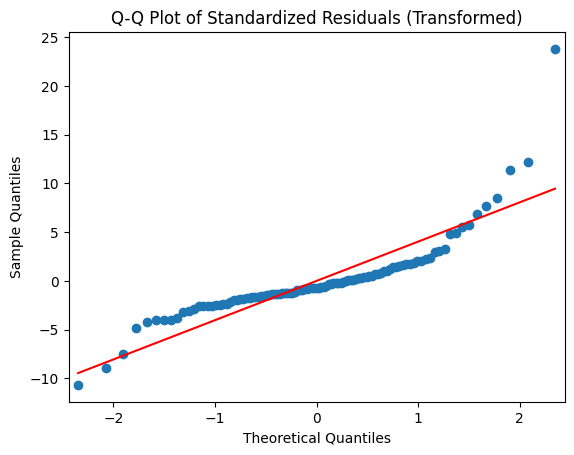


Kolmogorov-Smirnov Test (Transformed):
Statistic: 0.1652, p-value: 0.0057

Shapiro-Wilk Test (Transformed):
Statistic: 0.7929, p-value: 0.0000

Anderson-Darling Test (Transformed):
Statistic: 5.7162
Significance Level: 15.0%, Critical Value: 0.5560
Significance Level: 10.0%, Critical Value: 0.6330
Significance Level: 5.0%, Critical Value: 0.7600
Significance Level: 2.5%, Critical Value: 0.8860
Significance Level: 1.0%, Critical Value: 1.0540


In [ ]:

# Q-Q Plot
sm.qqplot(model_transformed.resid, line='s')
plt.title('Q-Q Plot of Standardized Residuals (Transformed)')
plt.show()

# Kolmogorov-Smirnov Test
ks_stat, ks_p_value = kstest(model_transformed.resid, 'norm', args=(model_transformed.resid.mean(), model_transformed.resid.std()))
print("\nKolmogorov-Smirnov Test (Transformed):")
print(f"Statistic: {ks_stat:.4f}, p-value: {ks_p_value:.4f}")

# Shapiro-Wilk Test
shapiro_stat, shapiro_p_value = shapiro(model_transformed.resid)
print("\nShapiro-Wilk Test (Transformed):")
print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p_value:.4f}")

# Anderson-Darling Test
anderson_result = anderson(model_transformed.resid)
print("\nAnderson-Darling Test (Transformed):")
print(f"Statistic: {anderson_result.statistic:.4f}")
for i, (sl, cv) in enumerate(zip(anderson_result.significance_level, anderson_result.critical_values)):
    print(f"Significance Level: {sl:.1f}%, Critical Value: {cv:.4f}")

#**Leverages** **and Outliers**


High Leverage Points:
[  0  13  32  48  63  66  99 100 108 113]


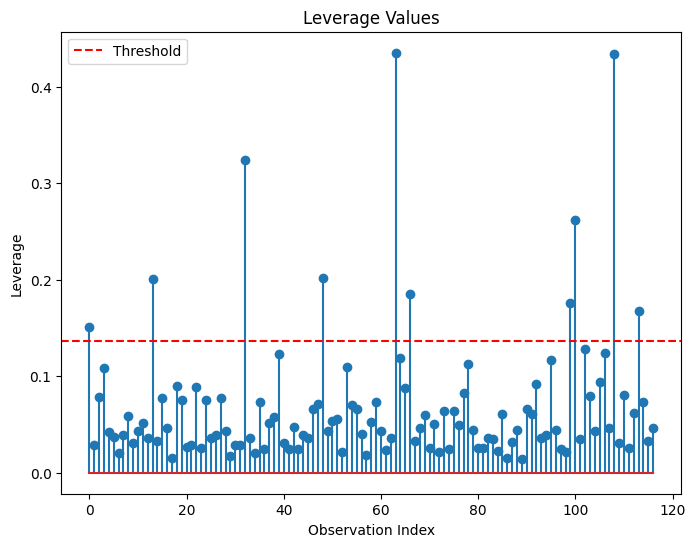


Outliers:
[97]


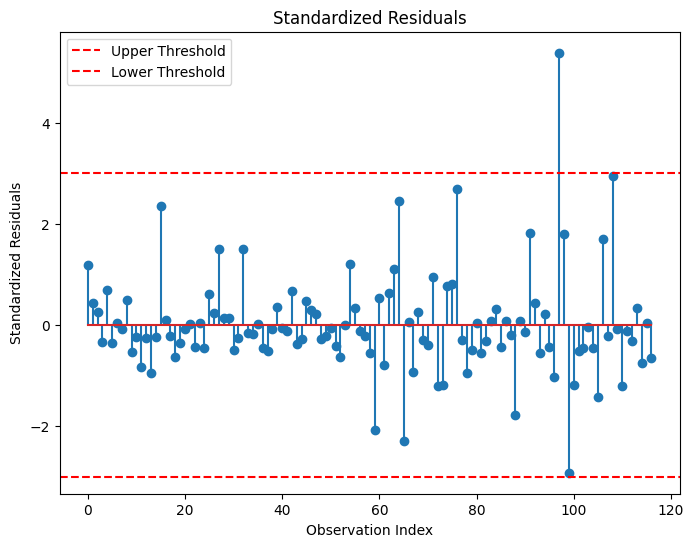

In [ ]:
# Hat matrix
influence = model.get_influence()
hat_values = influence.hat_matrix_diag

# Identify high leverage points
leverage_threshold = 2 * (len(independent_vars) + 1) / len(df_numeric)
high_leverage_points = np.where(hat_values > leverage_threshold)[0]

print("\nHigh Leverage Points:")
print(high_leverage_points)

# Plot Leverage
plt.figure(figsize=(8, 6))
plt.stem(hat_values)
plt.axhline(leverage_threshold, color='red', linestyle='--', label='Threshold')
plt.title('Leverage Values')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.legend()
plt.show()

# Residuals
standardized_residuals = influence.resid_studentized_internal
outlier_threshold = 3  # Standardized residual > 3 considered an outlier
outliers = np.where(abs(standardized_residuals) > outlier_threshold)[0]

print("\nOutliers:")
print(outliers)

# Plot Residuals
plt.figure(figsize=(8, 6))
plt.stem(standardized_residuals)
plt.axhline(outlier_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(-outlier_threshold, color='red', linestyle='--', label='Lower Threshold')
plt.title('Standardized Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Standardized Residuals')
plt.legend()
plt.show()

#**Leverages** and Outliers Transformed:


High Leverage Points (Transformed):
[  2  11  30  36  60  86  95 101]


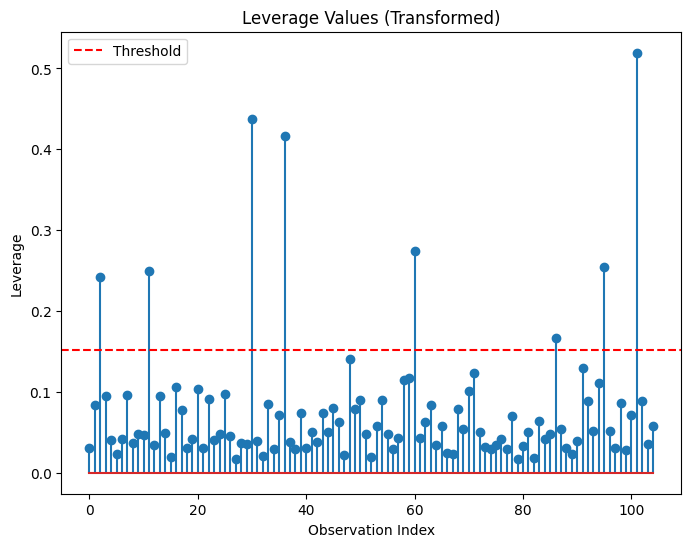


Outliers (Transformed):
[88]


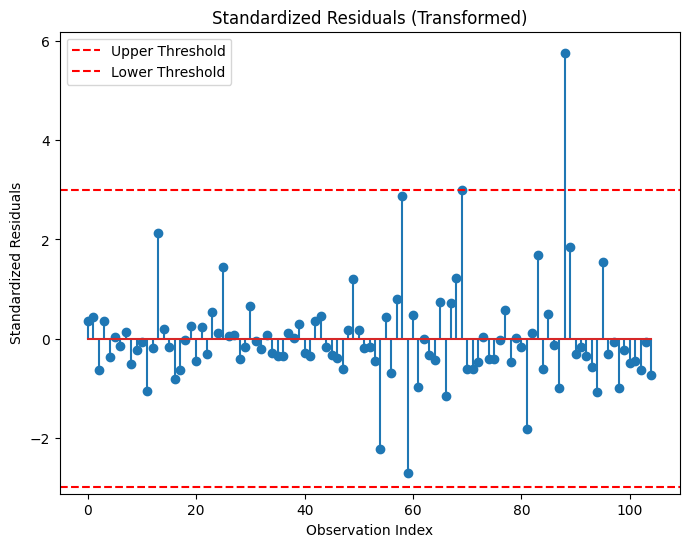

In [ ]:

# Hat matrix
influence_transformed = model_transformed.get_influence()
hat_values_transformed = influence_transformed.hat_matrix_diag

# Identify high leverage points
leverage_threshold_transformed = 2 * (len(transformed_cols) + 1) / len(df_numeric)
high_leverage_points_transformed = np.where(hat_values_transformed > leverage_threshold_transformed)[0]

print("\nHigh Leverage Points (Transformed):")
print(high_leverage_points_transformed)

# Plot Leverage
plt.figure(figsize=(8, 6))
plt.stem(hat_values_transformed)
plt.axhline(leverage_threshold_transformed, color='red', linestyle='--', label='Threshold')
plt.title('Leverage Values (Transformed)')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.legend()
plt.show()

# Residuals
standardized_residuals_transformed = influence_transformed.resid_studentized_internal
outlier_threshold_transformed = 3  # Standardized residual > 3 considered an outlier
outliers_transformed = np.where(abs(standardized_residuals_transformed) > outlier_threshold_transformed)[0]

print("\nOutliers (Transformed):")
print(outliers_transformed)

# Plot Residuals
plt.figure(figsize=(8, 6))
plt.stem(standardized_residuals_transformed)
plt.axhline(outlier_threshold_transformed, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(-outlier_threshold_transformed, color='red', linestyle='--', label='Lower Threshold')
plt.title('Standardized Residuals (Transformed)')
plt.xlabel('Observation Index')
plt.ylabel('Standardized Residuals')
plt.legend()
plt.show()

#Country Group Specific Data


Processing Country_Group: Underdeveloped

Checking linearity...

Processing Country_Group: Developing

Checking linearity...

Processing Country_Group: Developed

Checking linearity...

Transforming data for linearity...

Checking homoscedasticity...
Breusch-Pagan test p-value: 0.8539
Residuals are homoscedastic.


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


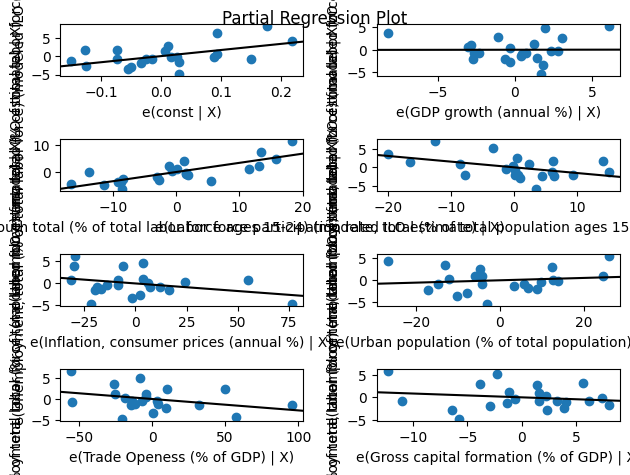

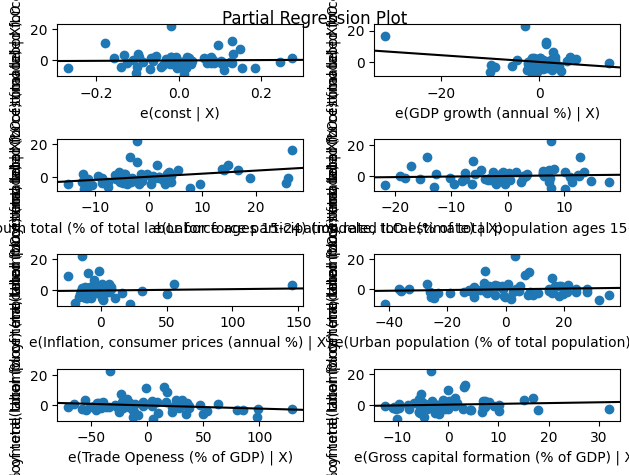

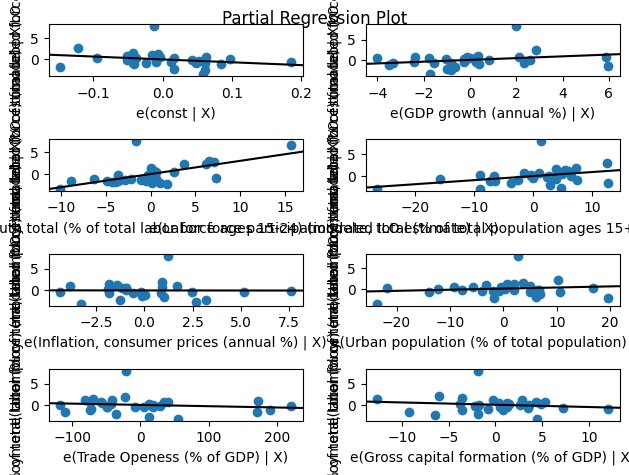

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from scipy.special import boxcox1p

# Load the dataset
df['Country_Group'] = df['Country_Group'].astype('category')

# Define dependent and independent variables
dependent_var = 'Unemployment, total (% of total labor force) (modeled ILO estimate)'
independent_vars = df.drop(columns=[dependent_var, 'Country_Group']).columns

# Initialize results dictionary
results_by_group = {}

# Process each Country Group
for group in df['Country_Group'].unique():
    print(f"\nProcessing Country_Group: {group}")
    group_data = df[df['Country_Group'] == group].dropna()

    # Define X and y
    X = group_data[independent_vars]
    y = group_data[dependent_var]

    # Check linearity
    print("\nChecking linearity...")
    partial_model = sm.OLS(y, sm.add_constant(X)).fit()
    sm.graphics.plot_partregress_grid(partial_model)

    # Apply transformations if needed (e.g., Box-Tidwell or Box-Cox)
print("\nTransforming data for linearity...")
X_transformed = X.copy()

for col in X.columns:
    if (X[col] <= 0).any():  # Handle non-positive values
        X_transformed[col] = np.log1p(X[col])  # Apply log transformation
    else:
        X_transformed[col] = boxcox1p(X[col], 0.15)  # Apply Box-Cox transformation

# Handle missing or infinite values after transformation
X_transformed.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf/-inf with NaN
X_transformed.dropna(inplace=True)  # Drop rows with NaN values

# Align `y` with `X_transformed`
y_aligned = y.loc[X_transformed.index]

# Check for homoscedasticity
print("\nChecking homoscedasticity...")
X_transformed = sm.add_constant(X_transformed)
model = sm.OLS(y_aligned, X_transformed).fit()
residuals = model.resid

# Perform Breusch-Pagan test
_, pval, _, _ = het_breuschpagan(residuals, X_transformed)
print(f"Breusch-Pagan test p-value: {pval:.4f}")
if pval > 0.05:
    print("Residuals are homoscedastic.")
else:
    print("Residuals show signs of heteroscedasticity.")





#Model Selection : Best Subset Selection

In [ ]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm

# Define your predictor and target variables
# Use original column names (before renaming or transformations)
X = df.loc[:,['GDP growth (annual %)',
    'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)',  # Corrected column name
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',  # Corrected column name
    'Inflation, consumer prices (annual %)',
    'Urban population (% of total population)',
    'Trade Openess (% of GDP)',  # Corrected column name
    'Gross capital formation (% of GDP)'
            ] ] # Predictor variables

y = df['Unemployment, total (% of total labor force) (modeled ILO estimate)']  # Target variable


def calculate_mallows_cp(X, y, sigma_squared):
    """
    Calculate Mallows' Cp for all subsets of predictors.

    Parameters:
    X (DataFrame): Predictor variables.
    y (Series): Target variable.
    sigma_squared (float): Estimate of the error variance.

    Returns:
    dict: Cp values for all subsets of predictors.
    """
    cp_results = []
    n = len(y)
    total_predictors = X.columns.tolist()

    # Iterate through all possible subset sizes
    for k in range(1, len(total_predictors) + 1):
        subsets = itertools.combinations(total_predictors, k)
        for subset in subsets:
            predictors = X[list(subset)]
            predictors = sm.add_constant(predictors)  # Add intercept

            # Fit the model
            model = sm.OLS(y, predictors).fit()
            rss = sum(model.resid**2)  # Residual Sum of Squares

            # Calculate Cp
            p = len(subset) + 1  # Add 1 for intercept
            cp = (rss / sigma_squared) - (n - 2 * p)
            cp_results.append({"subset": subset, "cp": cp, "num_predictors": p})
    return cp_results


def find_best_model(cp_results):
    """
    Find the model with the minimum Mallows' Cp.

    Parameters:
    cp_results (list): List of dictionaries containing Cp values and subsets.

    Returns:
    dict: The best model based on Mallows' Cp.
    """
    best_model = min(cp_results, key=lambda x: x["cp"])
    return best_model


# Estimate error variance (using the full model)
full_model = sm.OLS(y, sm.add_constant(X)).fit()
sigma_squared_est = sum(full_model.resid**2) / (len(y) - len(X.columns) - 1)

# Calculate Mallows' Cp for all subsets
cp_results = calculate_mallows_cp(X, y, sigma_squared_est)

# Find the best model
best_model = find_best_model(cp_results)

# Display results
print("Best Model:")
print(f"Predictors: {best_model['subset']}")
print(f"Minimum Mallows' Cp: {best_model['cp']:.2f}")

Best Model:
Predictors: ('GDP growth (annual %)', 'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)')
Minimum Mallows' Cp: -0.74


**Mallow Cp Calculation for different Predictors**

In [ ]:
def mallows_cp(X, y, sigma_squared):
    """
    Calculate Mallows' Cp for each subset of predictors.
    Parameters:
    X (DataFrame): Predictor variables.
    y (Series): Target variable.
    sigma_squared (float): Estimate of the error variance.
    Returns:
    dict: Cp values for models with different predictors.
    """
    cp_values = {}
    n = len(y)
    # Iterate through subsets of predictors
    for p in range(1, X.shape[1] + 1):
        # Select the first p predictors
        predictors = X.iloc[:, :p]
        predictors = sm.add_constant(predictors) # Add intercept
        # Fit the model
        model = sm.OLS(y, predictors).fit()
        rss = sum(model.resid ** 2) # Residual Sum of Squares
        # Calculate Cp
        cp = (rss / sigma_squared)-(n-2 * (p + 1)) # Add 1 for intercept
        cp_values[f"Model with {p} predictors"] = cp
    return cp_values

In [ ]:
def mallows_cp(X, y, sigma_squared):
    """
    Calculate Mallows' Cp for each subset of predictors.
    Parameters:
    X (DataFrame): Predictor variables.
    y (Series): Target variable.
    sigma_squared (float): Estimate of the error variance.
    Returns:
    dict: Cp values for models with different predictors.
    """
    cp_values = {}
    n = len(y)
    # Iterate through subsets of predictors
    for p in range(1, X.shape[1] + 1):
        # Select the first p predictors
        predictors = X.iloc[:, :p]
        predictors = sm.add_constant(predictors) # Add intercept
        # Fit the model
        model = sm.OLS(y, predictors).fit()
        rss = sum(model.resid ** 2) # Residual Sum of Squares
        # Calculate Cp
        cp = (rss / sigma_squared)-(n-2 * (p + 1)) # Add 1 for intercept
        cp_values[f"Model with {p} predictors"] = cp
    return cp_values

X = df.loc[:,['GDP growth (annual %)',
    'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)',  # Corrected column name
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',  # Corrected column name
    'Inflation, consumer prices (annual %)',
    'Urban population (% of total population)',
    'Trade Openess (% of GDP)',  # Corrected column name
    'Gross capital formation (% of GDP)'
            ] ] # Predictor variables
y = df['Unemployment, total (% of total labor force) (modeled ILO estimate)'] # Replace with the name of your target variable
# Estimate error variance (using the full model)
full_model = sm.OLS(y, sm.add_constant(X)).fit()
sigma_squared_est = sum(full_model.resid ** 2) / (len(y) - len(X.columns)-1)  # Fixed the indentation here
# Calculate Mallows' Cp
cp_results = mallows_cp(X, y, sigma_squared_est)
# Display results
for model, cp in cp_results.items():
    print(f"{model}: C_p = {cp:.2f}")

Model with 1 predictors: C_p = 52.16
Model with 2 predictors: C_p = -0.74
Model with 3 predictors: C_p = 1.26
Model with 4 predictors: C_p = 3.20
Model with 5 predictors: C_p = 5.19
Model with 6 predictors: C_p = 6.01
Model with 7 predictors: C_p = 8.00


#Influential Statistics : Leverages, Cooks Disance and Studentized Residuals

In [ ]:
# Calculate influence measures
influence = full_model.get_influence()
# Leverage (Hat values)
leverage = influence.hat_matrix_diag
# Cook's distance
cooks_d = influence.cooks_distance[0]
# Studentized residuals
studentized_residuals = influence.resid_studentized_external
# Combine results in a DataFrame
influence_df = pd.DataFrame({
    'Leverage': leverage,
    'Cooks_Distance': cooks_d,
    'Studentized_Residuals': studentized_residuals
}, index=df.index)
# Define thresholds
# Assuming 'p' should represent the number of predictors,
# it is calculated here using X.shape[1]
leverage_threshold = 2 * (X.shape[1] / X.shape[0])  # Common rule: 2 * (p/n) where p = X.shape[1], n = X.shape[0]
cooks_d_threshold = 4 / X.shape[0]  # Common rule: 4/n
studentized_residuals_threshold = 3  # Common rule: |residual| > 3
# Identify influential points
influence_df['Influential'] = (
    (influence_df['Leverage'] > leverage_threshold) |
    (influence_df['Cooks_Distance'] > cooks_d_threshold) |
    (influence_df['Studentized_Residuals'].abs() > studentized_residuals_threshold)
)
print("Influence Metrics:")
print(influence_df)
cleaned_df = df[~influence_df['Influential']]

Influence Metrics:
     Leverage  Cooks_Distance  Studentized_Residuals  Influential
0    0.150501    3.090371e-02               1.183472         True
1    0.029222    6.902277e-04               0.426687        False
2    0.078735    6.673992e-04               0.248867        False
3    0.108592    1.688162e-03              -0.331597        False
4    0.041688    2.635890e-03               0.694582        False
5    0.037526    5.933566e-04              -0.347516        False
6    0.020433    5.152713e-06               0.044250        False
7    0.038868    3.200555e-05              -0.079207        False
8    0.059092    1.887149e-03               0.488580        False
9    0.030357    1.105163e-03              -0.529658        False
10   0.043035    2.975057e-04              -0.229052        False
11   0.051948    4.613368e-03              -0.819462        False
12   0.035948    3.073973e-04              -0.255704        False
13   0.200899    2.844554e-02              -0.950986     

In [ ]:
df.head()
display(df)

,Country Name,Country_Group,"Unemployment, total (% of total labor force) (modeled ILO estimate)",GDP growth (annual %),"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)","Inflation, consumer prices (annual %)",Urban population (% of total population),Trade Openess (% of GDP),Gross capital formation (% of GDP)
0,Afghanistan,Underdeveloped,14.100,-6.240170,17.748,38.500,10.600000,26.616,72.885470,16.700000
1,Albania,Developing,11.588,4.856402,28.100,71.367,6.725203,63.799,84.698064,24.810000
2,Algeria,Developing,12.437,3.600000,31.992,45.641,9.265516,74.772,51.202376,34.851650
3,Argentina,Developing,6.805,4.956370,18.980,68.413,72.400000,92.347,31.547708,17.625050
4,Armenia,Developing,8.608,12.600000,19.011,72.719,8.640911,63.573,101.410778,21.634310
5,Australia,Developed,3.701,4.268946,8.233,79.521,6.594097,86.488,45.821770,23.573510
6,Austria,Developed,4.992,4.806430,10.350,78.469,8.546870,59.256,124.383451,27.548970
7,Azerbaijan,Developing,5.650,4.714802,13.583,76.589,13.852260,57.170,86.982273,12.003710
8,"Bahamas, The",Developing,9.870,10.782010,24.724,78.164,5.605406,83.492,83.174157,21.825610
9,Bahrain,Developing,1.326,4.891500,5.880,74.131,3.625741,89.743,166.345618,25.590000


#Model Comparison

In [ ]:
X_cleaned = X[~influence_df['Influential']]
y_cleaned = y[~influence_df['Influential']]
# Refit the model with the cleaned data
model_cleaned = sm.OLS(y_cleaned, sm.add_constant(X_cleaned)).fit()
print(model_cleaned.summary())

                                                     OLS Regression Results                                                    
Dep. Variable:     Unemployment, total (% of total labor force) (modeled ILO estimate)   R-squared:                       0.604
Model:                                                                             OLS   Adj. R-squared:                  0.573
Method:                                                                  Least Squares   F-statistic:                     19.57
Date:                                                                 Sat, 28 Dec 2024   Prob (F-statistic):           1.10e-15
Time:                                                                         22:26:05   Log-Likelihood:                -221.25
No. Observations:                                                                   98   AIC:                             458.5
Df Residuals:                                                                       90   BIC:           

#**ANOVA**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Create a DataFrame for ANOVA
df_anova = pd.DataFrame({
    'value': model_cleaned.fittedvalues,  # Fitted values
    'residuals': model_cleaned.resid,     # Residuals
    # Add other relevant columns from X_cleaned if necessary
})

# If you have a grouping variable in your data (e.g., 'TreatmentGroup'):
# df_anova['group'] = X_cleaned['TreatmentGroup']

# If you need to create a group based on some criteria:
# For example, let's create a group based on income levels (high or low)
# df_anova['group'] = pd.qcut(df_anova['value'], 2, labels=['low', 'high'])

# In this example, we'll just create a placeholder group (assuming no specific groups are needed):
df_anova['group'] = 1  # A single group

# Ensure 'group' is treated as a categorical variable
df_anova['group'] = df_anova['group'].astype('category')

# Check if the data is loaded correctly
if 'group' not in df_anova.columns or 'value' not in df_anova.columns:
    raise ValueError("The DataFrame must contain 'group' and 'value' columns.")

# Perform One-Way ANOVA
model = ols('value ~ C(group)', data=df_anova).fit()
anova_result = anova_lm(model)

# Print ANOVA table
print(anova_result)

# Interpretation
if anova_result['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")

            df      sum_sq   mean_sq   F  PR(>F)
C(group)   0.0    0.000000       NaN NaN     NaN
Residual  97.0  798.275372  8.229643 NaN     NaN
Fail to reject the null hypothesis: No significant difference between the groups.


<ipython-input-72-8cfa60bfd533>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_result['PR(>F)'][0] < 0.05:


#Check for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_cleaned.columns
vif_data["VIF"] = np.sqrt([variance_inflation_factor(X.values, i) for i in range(X.shape[1])])
print(vif_data)


                                            Variable       VIF
0                              GDP growth (annual %)  1.304076
1  Unemployment, youth total (% of total labor fo...  1.641904
2  Labor force participation rate, total (% of to...  3.972490
3              Inflation, consumer prices (annual %)  1.240617
4           Urban population (% of total population)  3.291185
5                           Trade Openess (% of GDP)  1.952196
6                 Gross capital formation (% of GDP)  3.209310


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Standardize the data to handle scaling issues
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define alpha values to tune
alphas = np.logspace(-4, 2, 100)

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, {'alpha': alphas}, cv=5)
ridge_cv.fit(X_scaled, y)

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, {'alpha': alphas}, cv=5)
lasso_cv.fit(X_scaled, y)

# Elastic Net Regression
elastic = ElasticNet(max_iter=10000)
elastic_cv = GridSearchCV(elastic, {'alpha': alphas}, cv=5)
elastic_cv.fit(X_scaled, y)

# Display the best alpha values and coefficients
print("Best Ridge alpha:", ridge_cv.best_params_['alpha'])
print("Ridge Coefficients:", ridge_cv.best_estimator_.coef_)

print("Best Lasso alpha:", lasso_cv.best_params_['alpha'])
print("Lasso Coefficients:", lasso_cv.best_estimator_.coef_)

print("Best Elastic Net alpha:", elastic_cv.best_params_['alpha'])
print("Elastic Net Coefficients:", elastic_cv.best_estimator_.coef_)


Best Ridge alpha: 32.745491628777316
Ridge Coefficients: [-0.80161429  2.22043822 -0.36583899  0.18039306  0.13643507 -0.30039971
 -0.06633797]
Best Lasso alpha: 0.572236765935022
Lasso Coefficients: [-0.49198805  2.477345   -0.          0.          0.         -0.
 -0.        ]
Best Elastic Net alpha: 0.49770235643321137
Elastic Net Coefficients: [-0.65550905  2.16449004 -0.17701147  0.01710183  0.         -0.06775329
 -0.        ]


#**THANK YOU!!!!**